In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * 
from tensorflow.keras.preprocessing.sequence import * 

In [2]:
df = pd.read_csv(r'C:\Users\44788\Desktop\OctaveML\Sunspots.csv')

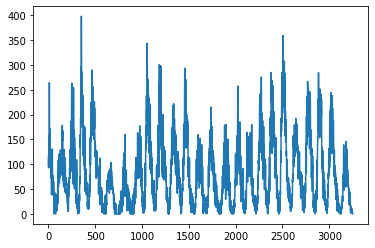

In [3]:
time = np.array(df['Unnamed: 0'])
series = np.array(df['Monthly Mean Total Sunspot Number'])
plt.plot(time, series) # appears to be seasonality 

In [4]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 60 # the cycle is 11-22 years, therefore, need 132 months
batch_size = 250
shuffle_biffer_size = 1000

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1) # removed top lambda layer, therefore need to manipulate here
    dataset = tf.data.Dataset.from_tensor_slices(series) # convert series to tf object - dataset
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) # define window and slice
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1)) # flatten data  
    dataset = dataset.shuffle(shuffle_buffer) # shiffles data
    dataset = dataset.map(lambda window: (window[:-1], window[-1])) # split data labels
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [11]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_biffer_size)
valid = windowed_dataset(x_valid, window_size, batch_size, shuffle_biffer_size)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

In [7]:
model = Sequential([
    Conv1D(filters=32, kernel_size=5, strides=1, padding='causal', activation='relu', input_shape=[None,1]),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dense(30, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1),
    Lambda(lambda x: x * 400)
])

lr_schedule = LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

model.compile(loss=Huber(),
             optimizer=SGD(lr=1e-8, momentum=0.9),
             metrics=["mae"])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(1e-08, 0.001, 0.0, 300.0)

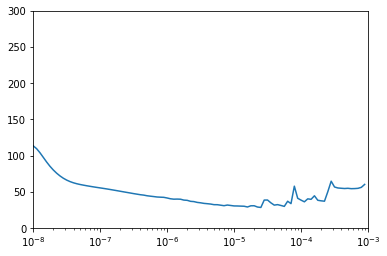

In [8]:
history = model.fit(dataset, epochs=100, verbose=0, callbacks=[lr_schedule])

lrs = 1e-8 *(10**(np.arange(100)/20)) 
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [9]:
model.compile(loss=Huber(),
             optimizer=SGD(lr=1e-5, momentum=0.9),
             metrics=["mae"])

history = model.fit(dataset, epochs=500, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
